**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

  * Name — название игры
  * Platform — платформа
  * Year_of_Release — год выпуска
  * Genre — жанр игры
  * NA_sales — продажи в Северной Америке (миллионы проданных копий)
  * EU_sales — продажи в Европе (миллионы проданных копий)
  * JP_sales — продажи в Японии (миллионы проданных копий)
  * Other_sales — продажи в других странах (миллионы проданных копий)
  * Critic_Score — оценка критиков (максимум 100)
  * User_Score — оценка пользователей (максимум 10)
  * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузим датасет и библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/datasets/games.csv', decimal = ',')

## Подготовьте данные

In [ ]:
# приведение к нижнему регистру названия столбцов
# c = df.columns
# df.columns = c.str.lower()

df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null object
genre              16713 non-null object
na_sales           16715 non-null object
eu_sales           16715 non-null object
jp_sales           16715 non-null object
other_sales        16715 non-null object
critic_score       8137 non-null object
user_score         10014 non-null object
rating             9949 non-null object
dtypes: object(11)
memory usage: 1.4+ MB


In [ ]:
# Преобразования в тип float позволит производить над столбцами математические операции, такие как ссумирование и сравнение 

df['year_of_release'] = pd.to_numeric(df.year_of_release)
df['na_sales'] = pd.to_numeric(df.na_sales)
df['eu_sales'] = pd.to_numeric(df.eu_sales)
df['jp_sales'] = pd.to_numeric(df.jp_sales)
df['other_sales'] = pd.to_numeric(df.other_sales)
df['critic_score'] = pd.to_numeric(df.critic_score)

In [ ]:
# так как оценки пользователей и критиков зачастую похожи, можно частично заменить tbd значения (будет заполнено), 
# которые мешают преобразованию типа 
# df.loc[(df.user_score == 'tbd'), 'user_score'] = round(df.critic_score/10, 1)

print('количество "tbd" пользовательских оценок:', len(df[df.user_score == 'tbd']))
print('процент "tbd" пользовательских оценок:', round(len(df[df.user_score == 'tbd'])*100/16715, 2))



количество "tbd" пользовательских оценок: 2424
процент "tbd" пользовательских оценок: 14.5


In [ ]:
df_crit_and_user = df[['user_score', 'critic_score']].dropna()
df_crit_and_user = df_crit_and_user[df_crit_and_user.user_score != 'tbd']
df_crit_and_user.user_score = pd.to_numeric(df_crit_and_user.user_score)

# Нулевая гипотеза: Средние оценки пользователей и критиков равны
# Альтернативная гипотеза: Средние оценки пользователей и критиков отличаются

from scipy import stats as st
sample_user = df_crit_and_user['user_score']
sample_crit = df_crit_and_user['critic_score']/10
results = st.ttest_ind(sample_user, sample_crit, equal_var = False)

print('p-значение: ', results.pvalue)
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу 'Средние оценки пользователей и критиков равны'")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.5180089033678826e-11
Отвергаем нулевую гипотезу 'Средние оценки пользователей и критиков равны'



<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
14.5 % достаточно много, отказываюсь от замены незаполненной оценки пользователей оценкой критиков. 
Так же проверила гипотезу о том, что оценки пользователей и критиков часто схожи. Она оказалась неверна.
Поэтому воспользуюсь советом и заменю значения 'tbd' на пропуски
</div>


In [ ]:
df.loc[(df.user_score == 'tbd'), 'user_score'] = np.nan

In [ ]:
df['user_score'] = pd.to_numeric(df.user_score)

In [ ]:
df.isna().sum()
# заменить пропуски в таких столбцах, как Year_of_Release и Genre достаточно сложно, поэтому я их удалю

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
df.dropna(subset = ['year_of_release', 'genre'], inplace = True)
df.isna().sum() # с ними же удалились и строки с пропущеным названием

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [ ]:
df['sum_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

# для замены пропущенных Critic_Score и User_Score возьму среднее по жанру и продажам 

gr_critic = df.groupby(['sum_sales'])['critic_score'].transform('median')
gr_user = df.groupby(['sum_sales'])['user_score'].transform('median')

df['critic_score'] = df['critic_score'].fillna(round(gr_critic,2))
df['user_score'] = df['user_score'].fillna(round(gr_user,2))
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score        183
user_score          167
rating             6676
sum_sales             0
dtype: int64

In [ ]:
# при больших продажах возникли группы с единственной игрой без рейтинга, что бы взять рейтинг с соседних по продажам игр
# уменьшила разброс по группам

df['sum_sales10'] = round((df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'])/30, 0)

gr_critic = df.groupby(['sum_sales10'])['critic_score'].transform('median')
gr_user = df.groupby(['sum_sales10'])['user_score'].transform('median')

df['critic_score'] = df['critic_score'].fillna(round(gr_critic,2))
df['user_score'] = df['user_score'].fillna(round(gr_user,2))
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
sum_sales             0
sum_sales10           0
dtype: int64

так как поле Rating сложно заполнить без знания содержания игр, оставлю его пустым



## Исследовательский анализ данных
колличество игр, выпущенных по годам

In [ ]:
df_year = df.groupby('year_of_release').agg({'year_of_release':['mean'], 'name':['count']})
df_year.columns = ['year_of_release', 'cnt']
df_year
# видно, что с течением времени колличество игр, выпускаемых в год растет до 2009 года, потом имеется спад.
# Если рассматривать колличество игр до 1993 года, то их количество не превышает 3-4% от общей выборки (16444)

,year_of_release,cnt
year_of_release,,
1980.0,1980.0,9
1981.0,1981.0,46
1982.0,1982.0,36
1983.0,1983.0,17
1984.0,1984.0,14
1985.0,1985.0,14
1986.0,1986.0,21
1987.0,1987.0,16
1988.0,1988.0,15


No handles with labels found to put in legend.


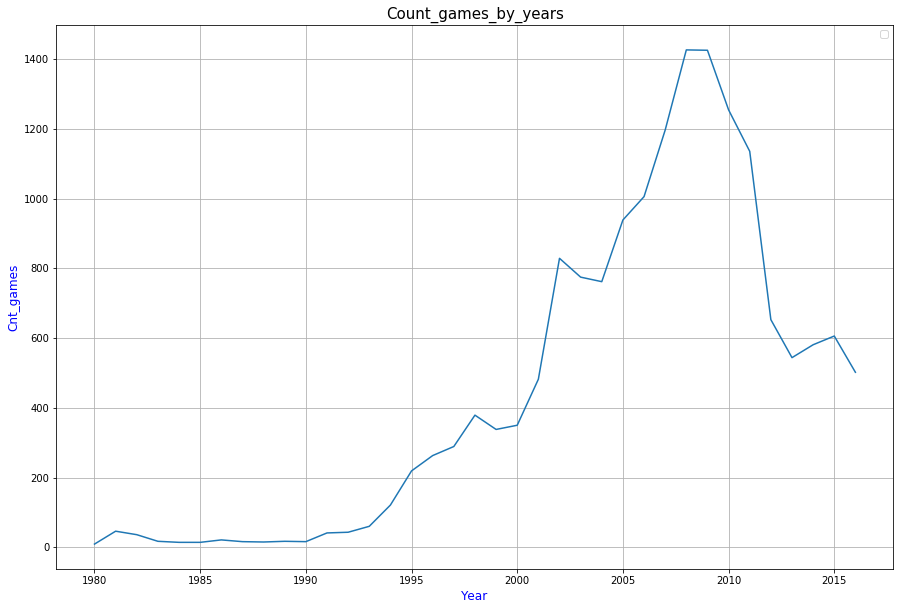

In [ ]:
df.groupby('year_of_release').agg({'name':['count']})

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_year['year_of_release'], df_year['cnt'])

plt.title('Count_games_by_years', fontsize=15)
plt.xlabel('Year', fontsize=12, color='blue')
plt.ylabel('Cnt_games', fontsize=12, color='blue')
plt.legend()
plt.grid(True)

In [ ]:
# Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте 
# распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

df_platform = df.groupby('platform').agg({'sum_sales':['sum']})
df_platform.columns=['sum_sales']
df_platform.sort_values('sum_sales')

,sum_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


In [ ]:
# взяла 6 наиболее прибыльных платформ

df_ps2 = df[df['platform'] == 'PS2'].groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_ps2.columns = ['year_of_release', 'sum_sales']

df_x360 = df[df['platform'] == 'X360'].groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_x360.columns = ['year_of_release', 'sum_sales']

df_ps3 = df[df['platform'] == 'PS3'].groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_ps3.columns = ['year_of_release', 'sum_sales']

df_wii = df[df['platform'] == 'Wii'].groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_wii.columns = ['year_of_release', 'sum_sales']

df_ps = df[df['platform'] == 'PS'].groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_ps.columns = ['year_of_release', 'sum_sales']

df_ds = df[df['platform'] == 'DS'].groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_ds.columns = ['year_of_release', 'sum_sales']

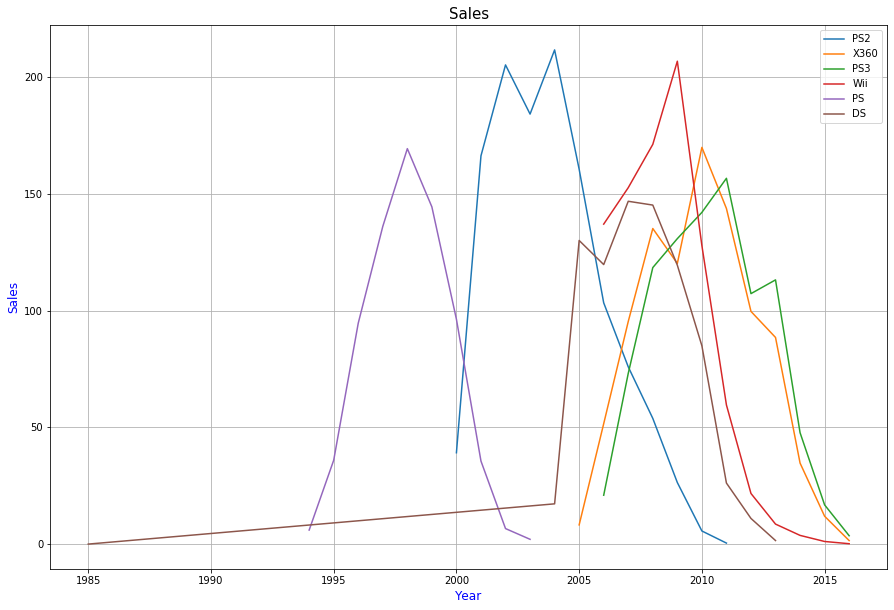

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_ps2['year_of_release'], df_ps2['sum_sales'], label='PS2')
ax.plot(df_x360['year_of_release'], df_x360['sum_sales'], label='X360')
ax.plot(df_ps3['year_of_release'], df_ps3['sum_sales'], label='PS3')
ax.plot(df_wii['year_of_release'], df_wii['sum_sales'], label='Wii')
ax.plot(df_ps['year_of_release'], df_ps['sum_sales'], label='PS')
ax.plot(df_ds['year_of_release'], df_ds['sum_sales'], label='DS')

plt.title('Sales', fontsize=15)
plt.xlabel('Year', fontsize=12, color='blue')
plt.ylabel('Sales', fontsize=12, color='blue')
plt.legend()
plt.grid(True)

По графику видно, что средняя продолжительность жизни платформ около 10 лет

За актуальный период определите можно взять года с 1995 по 2016, так как наиболее крупные компании осуществляли свою деятельность именно в эти годы. Второй вариант - с 2005 по 2016, когда на рынке наблюдается сразу 3-5 крупных платформ.

Для того, что бы определиться окончательно стоит попосмотреть на общую картину рынка

No handles with labels found to put in legend.


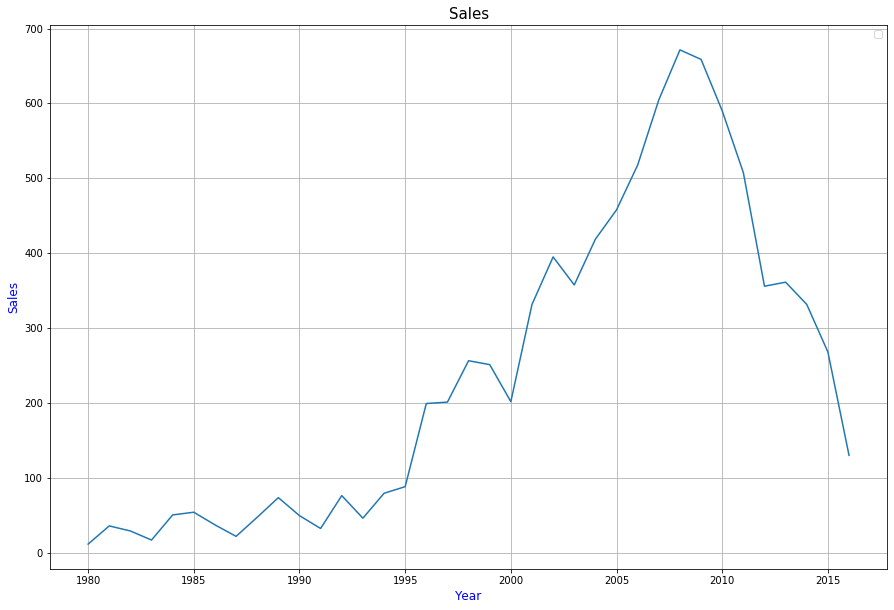

In [ ]:
df_sales = df.groupby('year_of_release').agg({'year_of_release':['mean'],'sum_sales':['sum']})
df_sales.columns = ['year_of_release', 'sum_sales']

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_sales['year_of_release'], df_sales['sum_sales'])

plt.title('Sales', fontsize=15)
plt.xlabel('Year', fontsize=12, color='blue')
plt.ylabel('Sales', fontsize=12, color='blue')
plt.legend()
plt.grid(True)

По данному графику выделяются две даты: 1995 год, как старт резкого роста продаж и 2008 год, как начало спада объемов продаж.
Так как на обоих графиках присутствует 1995 год, возьму отсечение по этой дате.

In [ ]:
df = df[df.year_of_release >= 2013.0]


<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Возьму данные с 2013 года в связи с началом сильного роста популярности в этот год.
</div>


In [ ]:
# Для опредения потенциально прибыльных платформ, нужно искать, продажи которых растут

df_grow = df[['platform', 'year_of_release', 'sum_sales']]
df_grow['id'] = df_grow.platform + df_grow.year_of_release.astype(str)
df_grow = df_grow.groupby(['id']).agg({'platform':['max'], 'year_of_release':['mean'], 'sum_sales':['sum']})
df_grow.columns = ['platform', 'year_of_release','sum_sales']

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


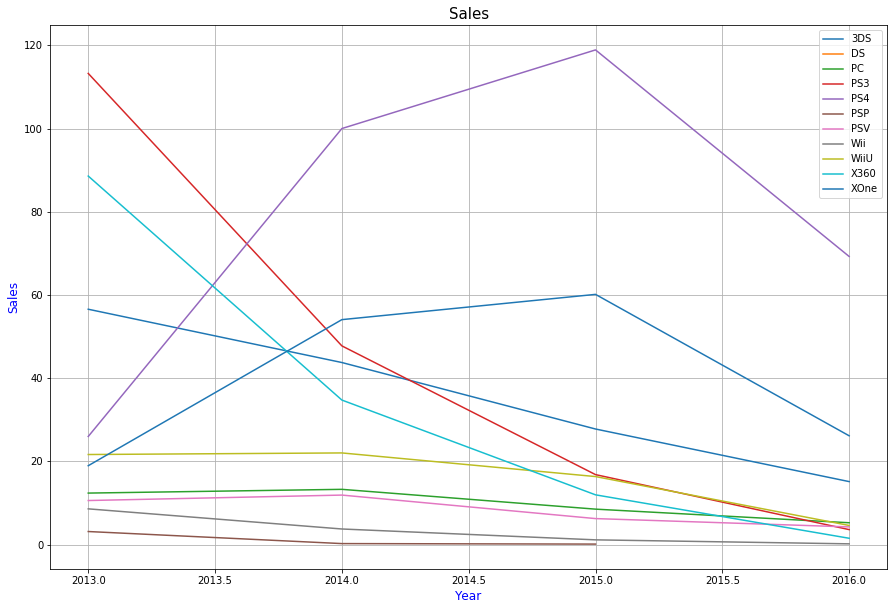

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
for platform in df_grow.platform.unique():
    df_plt = df_grow[df_grow.platform == platform]
    ax.plot(df_plt['year_of_release'], df_plt['sum_sales'], label=platform)


plt.title('Sales', fontsize=15)
plt.xlabel('Year', fontsize=12, color='blue')
plt.ylabel('Sales', fontsize=12, color='blue')
plt.legend()
plt.grid(True)

В таблице всего 3 компании, растущие на 2016 год, из них у PS4 довольно высокие продажи, что может свидетельствовать о пике успеха. Остаются только Wii и WiiU.

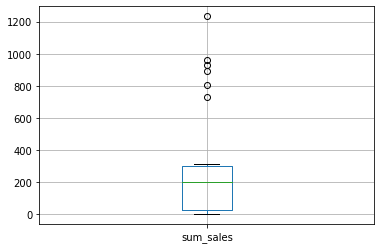

In [ ]:
df_platform.boxplot(column='sum_sales')
plt.show()

PS3


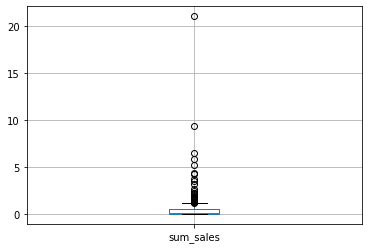

X360


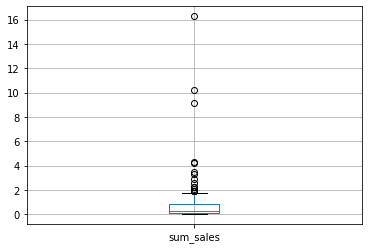

PS4


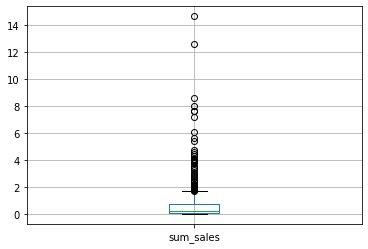

3DS


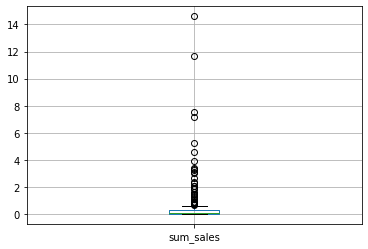

XOne


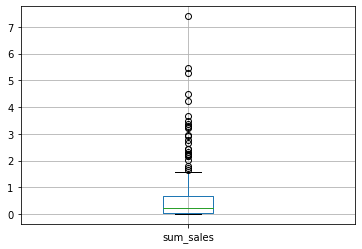

WiiU


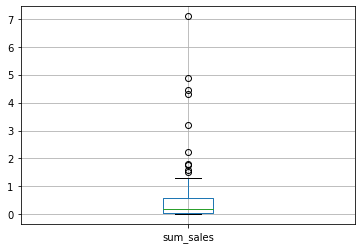

Wii


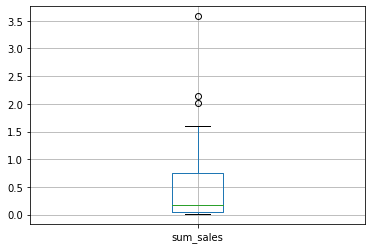

PC


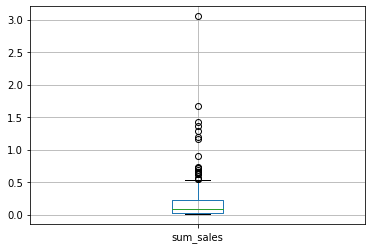

PSV


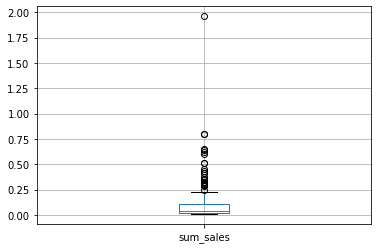

DS


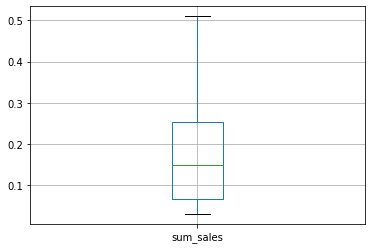

PSP


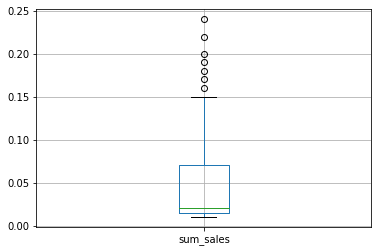

In [ ]:
for plat in df.platform.unique():
    print(plat)
    df[df.platform == plat].boxplot(column='sum_sales')
    plt.show()

In [ ]:
q = []
q3=[]
for el in df['platform'].unique():
    q.append(df[df.platform == el]['sum_sales'].describe()[6])
    q3.append(3*df[df.platform == el]['sum_sales'].describe()[6])

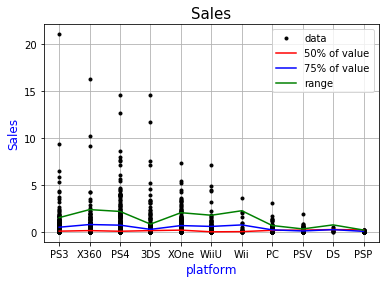

In [ ]:
plt.errorbar(df['platform'], df['sum_sales'], fmt= '.k', label='data')
plt.errorbar(df['platform'].unique(), df.groupby('platform').agg({'sum_sales':['median']}), fmt= '-r', label='50% of value')
plt.errorbar(df['platform'].unique(), q, fmt= '-b', label='75% of value')
plt.errorbar(df['platform'].unique(), q3, fmt= '-g', label='range')

plt.title('Sales', fontsize=15)
plt.xlabel('platform', fontsize=12, color='blue')
plt.ylabel('Sales', fontsize=12, color='blue')
plt.legend()
plt.grid(True)


<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Согласно диаграммам размаха для для 75% игр, их ссумарная рыночная стоиость не превышает 1 млн проданных копий, о чем говорят границы синего прямоугольника. В размах «усов» так же попадают нормальные значения (до поперечной линии), а за пределами находятся выбросы, изображённые точками. Наибольший размах по платформам равен 2 млн копий, наименьший 0. Диаграммы построены по данным с 2013 по 2016 года.
</div>


(0, 4)

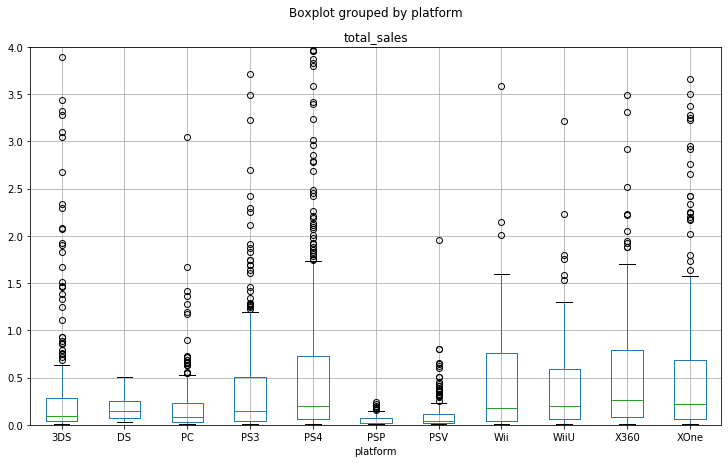

In [ ]:
# КОД РЕВЬЮЕРА

df1 = df.copy()

# Добавляю столбец без округления, чтобы не терять данные. 
df1['total_sales'] = df1[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

df1.boxplot('total_sales', by='platform', figsize=(12,7))

plt.ylim(0,4)

Основная часть заработка занимает лишь нижнюю треть диапазона. В то время, как выбросы довольно велики. Однако мы не можем исключить их из выборки, так как именно такие случаи обычно наиболее интересны заказчику

In [ ]:
# df[df.platform == '3DS'].plot(x='sum_sales', y='critic_score', kind='scatter'), df[df.platform == '3DS'].plot(x='sum_sales', y='user_score', kind='scatter')

Text(0, 0.5, 'score')

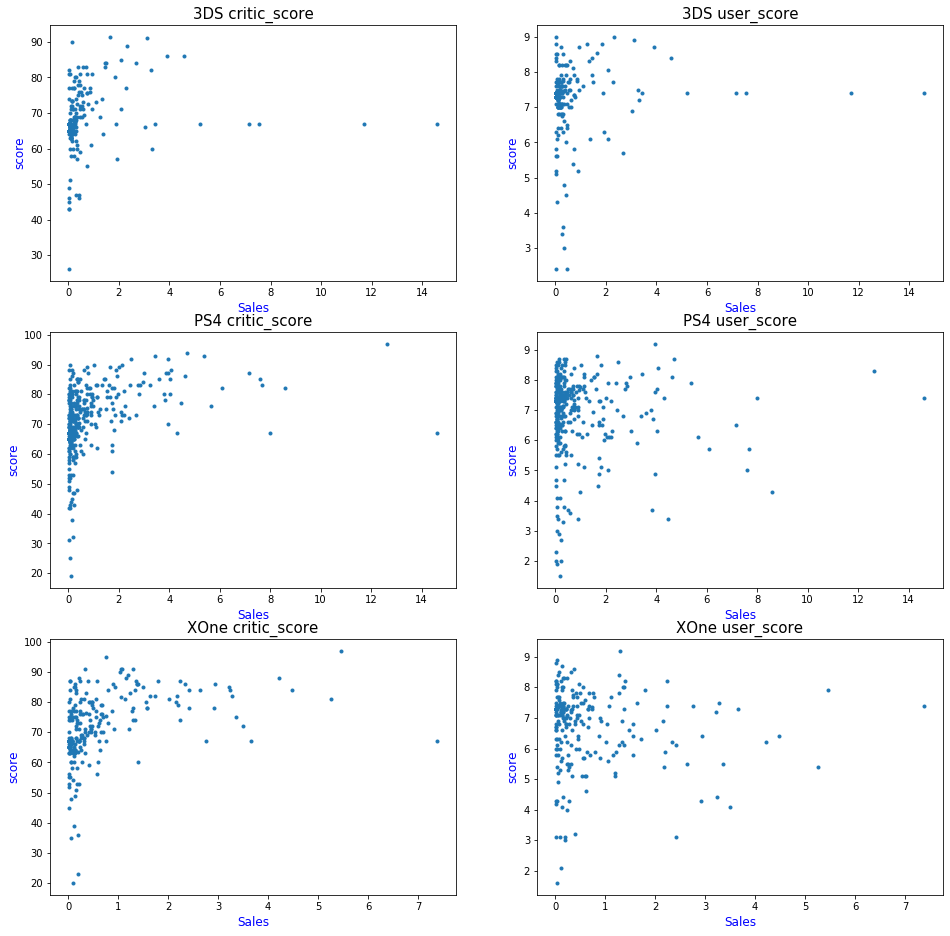

In [ ]:
# Исходный набор данных
x1 = df[df.platform == '3DS']['sum_sales']
y1 = df[df.platform == '3DS']['critic_score']
y2 = df[df.platform == '3DS']['user_score']

x3 = df[df.platform == 'PS4']['sum_sales']
y3 = df[df.platform == 'PS4']['critic_score']
y4 = df[df.platform == 'PS4']['user_score']

x5 = df[df.platform == 'XOne']['sum_sales']
y5 = df[df.platform == 'XOne']['critic_score']
y6 = df[df.platform == 'XOne']['user_score']

# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
plt.plot(x1, y1, '.')
plt.title('3DS critic_score', fontsize=15)
plt.xlabel('Sales', fontsize=12, color='blue')
plt.ylabel('score', fontsize=12, color='blue')

plt.subplot(3, 2, 2)
plt.plot(x1, y2, '.')
plt.title('3DS user_score', fontsize=15)
plt.xlabel('Sales', fontsize=12, color='blue')
plt.ylabel('score', fontsize=12, color='blue')

plt.subplot(3, 2, 3)
plt.plot(x3, y3, '.')
plt.title('PS4 critic_score', fontsize=15)
plt.xlabel('Sales', fontsize=12, color='blue')
plt.ylabel('score', fontsize=12, color='blue')

plt.subplot(3, 2, 4)
plt.plot(x3, y4, '.')
plt.title('PS4 user_score', fontsize=15)
plt.xlabel('Sales', fontsize=12, color='blue')
plt.ylabel('score', fontsize=12, color='blue')

plt.subplot(3, 2, 5)
plt.plot(x5, y5, '.')
plt.title('XOne critic_score', fontsize=15)
plt.xlabel('Sales', fontsize=12, color='blue')
plt.ylabel('score', fontsize=12, color='blue')

plt.subplot(3, 2, 6)
plt.plot(x5, y6, '.')
plt.title('XOne user_score', fontsize=15)
plt.xlabel('Sales', fontsize=12, color='blue')
plt.ylabel('score', fontsize=12, color='blue')

На обоих графиках видна примерно одинаковая ситуация. При невысоких продажах, оценка меняется от наименьшей до наибольшей. Чем выше продажи, тем выше оценки и пользователей и критиков. Второй график, чуть более размыт, скорее всего, потому что оценки пользователей более собирательны, чем оценки критиков

In [ ]:
display(df[df.platform == '3DS'][['sum_sales', 'critic_score']].corr())
display(df[['sum_sales', 'critic_score']].corr())

,sum_sales,critic_score
sum_sales,1.000000,0.193308
critic_score,0.193308,1.000000


,sum_sales,critic_score
sum_sales,1.000000,0.318928
critic_score,0.318928,1.000000


In [ ]:
display(df[df.platform == '3DS'][['sum_sales', 'user_score']].corr())
display(df[['sum_sales', 'user_score']].corr())

,sum_sales,user_score
sum_sales,1.000000,0.072559
user_score,0.072559,1.000000


,sum_sales,user_score
sum_sales,1.000000,-0.043453
user_score,-0.043453,1.000000


Значение корреляции далеко от 1, однако довольно неплохая связь прослеживается при рассмотрении платформы PS2. И эти значения выше средних по индустрии. Так же виден эфект размытости у оценок пользователей - их корреляция ниже, чем у оценок критиков

In [ ]:
df_distr = df.groupby('genre').agg({'name':['count'], 'sum_sales':['sum']})
df_distr = df_distr.merge(df[df.platform == '3DS'].groupby('genre').agg({'name':['count'], 'sum_sales':['sum']}), on='genre', how='left')
df_distr.columns = ['all_cnt', 'all_sum','3DS_cnt', '3DS_sum']
df_distr = df_distr.merge(df[df.platform == 'PS4'].groupby('genre').agg({'name':['count'], 'sum_sales':['sum']}), on='genre', how='left')
df_distr.columns = ['all_cnt', 'all_sum','3DS_cnt', '3DS_sum','PS4_cnt', 'PS4_sum']
df_distr = df_distr.merge(df[df.platform == 'XOne'].groupby('genre').agg({'name':['count'], 'sum_sales':['sum']}), on='genre', how='left')
df_distr.columns = ['all_cnt', 'all_sum','3DS_cnt', '3DS_sum','PS4_cnt', 'PS4_sum','XOne_cnt', 'XOne_sum']
df_distr

,all_cnt,all_sum,3DS_cnt,3DS_sum,PS4_cnt,PS4_sum,XOne_cnt,XOne_sum
genre,,,,,,,,
Action,766,321.87,116.0,34.04,144,96.10,85.0,37.31
Adventure,245,23.64,27.0,3.33,28,6.34,14.0,2.68
Fighting,80,35.31,7.0,8.21,18,8.65,7.0,2.45
Misc,155,62.82,32.0,7.10,20,8.19,19.0,7.43
Platform,74,42.63,15.0,8.79,12,7.69,5.0,0.93
Puzzle,17,3.17,9.0,1.73,1,0.02,NaN,NaN
Racing,85,39.89,NaN,NaN,19,12.14,20.0,9.79
Role-Playing,292,145.89,62.0,67.37,51,28.99,14.0,10.55
Shooter,187,232.98,1.0,0.06,41,88.56,38.0,60.33


In [ ]:
df_distr_m = df.groupby('genre').agg({'sum_sales':['mean','median']})
df_distr_m = df_distr_m.merge(df[df.platform == '3DS'].groupby('genre').agg({'sum_sales':['mean','median']}), on='genre', how='left')
df_distr_m.columns = ['all_mean', 'all_median','3DS_mean', '3DS_median']
df_distr_m = df_distr_m.merge(df[df.platform == 'PS4'].groupby('genre').agg({'sum_sales':['mean','median']}), on='genre', how='left')
df_distr_m.columns = ['all_mean', 'all_median','3DS_mean', '3DS_median','PS4_mean', 'PS4_median']
df_distr_m = df_distr_m.merge(df[df.platform == 'XOne'].groupby('genre').agg({'sum_sales':['mean','median']}), on='genre', how='left')
df_distr_m.columns = ['all_mean', 'all_median','3DS_mean', '3DS_median','PS4_mean', 'PS4_median','XOne_mean', 'XOne_median']
df_distr_m

,all_mean,all_median,3DS_mean,3DS_median,PS4_mean,PS4_median,XOne_mean,XOne_median
genre,,,,,,,,
Action,0.420196,0.110,0.293448,0.070,0.667361,0.155,0.438941,0.150
Adventure,0.096490,0.030,0.123333,0.060,0.226429,0.070,0.191429,0.060
Fighting,0.441375,0.125,1.172857,0.080,0.480556,0.170,0.350000,0.200
Misc,0.405290,0.100,0.221875,0.080,0.409500,0.075,0.391053,0.180
Platform,0.576081,0.225,0.586000,0.240,0.640833,0.300,0.186000,0.160
Puzzle,0.186471,0.060,0.192222,0.100,0.020000,0.020,NaN,NaN
Racing,0.469294,0.120,NaN,NaN,0.638947,0.230,0.489500,0.185
Role-Playing,0.499623,0.125,1.086613,0.175,0.568431,0.200,0.753571,0.320
Shooter,1.245882,0.450,0.060000,0.060,2.160000,0.970,1.587632,1.095


Продажи по разным жанрам могут отличаться более, чем в 10 раз. В основном это коррелирует с количеством игр в жанре, однако не всегда. Наиболее успешными жанрами по продажам можно считать Action, Sports, Shooter и Role-Playing.

## Портрет пользователя каждого региона

In [ ]:
platform_in_region = df.groupby('platform').agg({'na_sales':['sum'], 'eu_sales':['sum'], 'jp_sales':['sum']})
platform_in_region.columns = ['na_sales', 'eu_sales', 'jp_sales']

display('топ платформ в Северной Америке')
display(platform_in_region.sort_values('na_sales').tail())

display('топ платформ в Европе')
display(platform_in_region.sort_values('eu_sales').tail())

display('топ платформ в Японии')
display(platform_in_region.sort_values('jp_sales').tail())

'топ платформ в Северной Америке'

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
PS3,63.50,67.81,23.35
X360,81.66,42.52,0.51
XOne,93.12,51.59,0.34
PS4,108.74,141.09,15.96


'топ платформ в Европе'

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
X360,81.66,42.52,0.51
XOne,93.12,51.59,0.34
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96


'топ платформ в Японии'

,na_sales,eu_sales,jp_sales
platform,,,
WiiU,29.21,19.85,10.88
PS4,108.74,141.09,15.96
PSV,5.04,6.10,18.59
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81


Топы платформ в разных регионах достаточно схож, однако они стоят на разных позициях. Разница кроется в регионах происхождения этих платформ. Очевидно, что люди чаще поддерживают месных производителей.

In [ ]:
genre_in_region = df.groupby('genre').agg({'na_sales':['sum'], 'eu_sales':['sum'], 'jp_sales':['sum']})
genre_in_region.columns = ['na_sales', 'eu_sales', 'jp_sales']

display('топ жанров в Северной Америке')
display(genre_in_region.sort_values('na_sales').tail())

display('топ жанров в Европе')
display(genre_in_region.sort_values('eu_sales').tail())

display('топ жанров в Японии')
display(genre_in_region.sort_values('jp_sales').tail())

'топ жанров в Северной Америке'

,na_sales,eu_sales,jp_sales
genre,,,
Misc,27.49,20.04,9.20
Role-Playing,46.40,36.97,51.04
Sports,65.27,60.52,5.41
Shooter,109.74,87.86,6.61
Action,126.05,118.13,40.49


'топ жанров в Европе'

,na_sales,eu_sales,jp_sales
genre,,,
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Sports,65.27,60.52,5.41
Shooter,109.74,87.86,6.61
Action,126.05,118.13,40.49


'топ жанров в Японии'

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,109.74,87.86,6.61
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Action,126.05,118.13,40.49
Role-Playing,46.40,36.97,51.04


Разница в жанрах ниже, чем в платформах. Однако в японии игры Role-Playing оказались на первом месте, а вот жанр Shooter совсем не попал в топ 5

In [ ]:
df.rating = df.rating.fillna('NaN')

rating_in_region = df.groupby('rating').agg({'na_sales':['sum'], 'eu_sales':['sum'], 'jp_sales':['sum']})
rating_in_region.columns = ['na_sales', 'eu_sales', 'jp_sales']

display('рейтинг в Северной Америке')
display(rating_in_region.sort_values('na_sales'))

display('рейтинг в Европе')
display(rating_in_region.sort_values('eu_sales'))

display('рейтинг в Японии')
display(rating_in_region.sort_values('jp_sales'))

'рейтинг в Северной Америке'

,na_sales,eu_sales,jp_sales
rating,,,
T,49.79,41.95,20.59
E10+,54.24,42.69,5.89
E,79.05,83.36,15.14
NaN,89.42,78.91,85.05
M,165.21,145.32,14.11


'рейтинг в Европе'

,na_sales,eu_sales,jp_sales
rating,,,
T,49.79,41.95,20.59
E10+,54.24,42.69,5.89
NaN,89.42,78.91,85.05
E,79.05,83.36,15.14
M,165.21,145.32,14.11


'рейтинг в Японии'

,na_sales,eu_sales,jp_sales
rating,,,
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
E,79.05,83.36,15.14
T,49.79,41.95,20.59
NaN,89.42,78.91,85.05



<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Игры с пропущенным рейтингом оказались достаточно популярны, они стоят на 2-3 месте в Европе и Америке, и аж на первом в Японии. Интересно, что это единственная строка в списке, где продажи примерно равны от региона к региону. Установка этого параметра часто вызывает трудности, при насыщеном содержании, которое может содержать контент для разных групп населения. Такая гибкость к пользователю привлекает больше внимания и делает игры интереснее для большего круга людей.
</div>


In [ ]:
df[df.platform == '3DS']['rating'].value_counts()

NaN     199
E10+     41
E        39
T        18
M         6
Name: rating, dtype: int64

В Японии оказались невостребованными такие рейтинги, как adults only, early childhood и rating pending. По первым двум в других регионах продажи есть


## Проверьте гипотезы


Гипотезы буду выстраивать исходя от знака "=", который обычно применяется в нулевой гипотизе.

In [ ]:
# Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны
# Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различается

from scipy import stats as st
sample_xone = df[df['platform'] == 'XOne']['user_score']
sample_ps = df[df['platform'] == 'PC']['user_score']
results = st.ttest_ind(sample_xone, sample_ps, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу 'Средние пользовательские рейтинги платформ Xbox One и PC равны'")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.056840318955344235
Не получилось отвергнуть нулевую гипотезу



<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Не получается проверить гипотизу, так как платформа PC существовала с 1994 по 2003, а за актуальный период были взяты даты с 2005 года и по условию задачи, все, что было до этого мы не учитываем.
</div>


In [ ]:
# Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
# Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

from scipy import stats as st
sample_action = df[df['genre'] == 'Action']['user_score']
sample_sports = df[df['genre'] == 'Sports']['user_score']
results = st.ttest_ind(sample_action, sample_sports, equal_var = False)

print('p-значение: ', results.pvalue)
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу 'Средние пользовательские рейтинги жанров Action и Sports равны'")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.609081770365552e-21
Отвергаем нулевую гипотезу 'Средние пользовательские рейтинги жанров Action и Sports равны'


Для проверки гипотиз взяла за alpha 5%, как стандартное значение. Однако стоит заметить, что даже значительные сдвиги  порогового значения (к 1%) не привели бы к другим выводам.

## Вывод

По итогу проекта можно сказать, что начиная с 2008 года продажи игр сильно падают и сейчас не самое подходящее время для запуска чего-то стандартного и уже известного. Возможно стоит заняться разработками в смежных областях или новыми продуктами. Думаю, что стоит ориентироваться на такие жанры, как Action, Sports, Shooter и Role-Playing в совокупности с рынком, на который идет ориентация. Серьезную конкурению в этой области может составить платформа PS4, которая имеет богатый опыт в этой сфере.

Исследование показало, что 

    * пользователям Америки больше всего нравятся консоли PS4, XOne и жанр Action 
    * пользователям Европы нравятся платформа PS4 и жанр Action 
    * пользователи Японии предпочитают отечественную 3DS и жанр Role-Playing

Интересным открытием стало то, что высокая оценка пользователей или критиков не гарантирует высоких продаж. Эта зависимость работает только в обратную сторону, но тоже не всегда.

Так же согласно проверенным гипотезам, пользовательские рейтинги платформ Xbox One и PC различаются, как и средние пользовательские рейтинги жанров Action и Sports.